In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score
from keras.callbacks import EarlyStopping, ModelCheckpoint

#https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset?resource=download

In [7]:
dataset = np.loadtxt('diabetes_binary_5050split_health_indicators_BRFSS2015.csv', delimiter=",", skiprows=1)
np.random.shuffle(dataset)
dataset

array([[ 0.,  0.,  0., ...,  2.,  6.,  8.],
       [ 0.,  0.,  0., ...,  1.,  6.,  7.],
       [ 0.,  0.,  0., ...,  7.,  4.,  8.],
       ...,
       [ 1.,  0.,  1., ..., 11.,  4.,  5.],
       [ 1.,  0.,  1., ...,  5.,  4.,  8.],
       [ 1.,  1.,  1., ..., 10.,  4.,  7.]])

In [8]:
df = pd.read_csv("diabetes_binary_5050split_health_indicators_BRFSS2015.csv", sep=",")
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


In [9]:
X_Overfit = dataset[:, 1:]
Y_Overfit = dataset[:, 0]

0.5


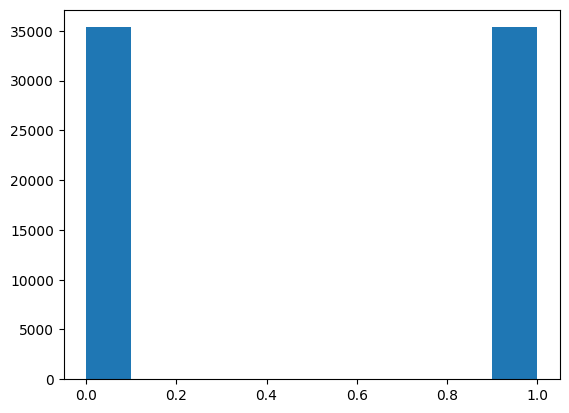

In [10]:
print(sum(Y_Overfit)/70692)

plt.hist(df['Diabetes_binary'])
plt.show()

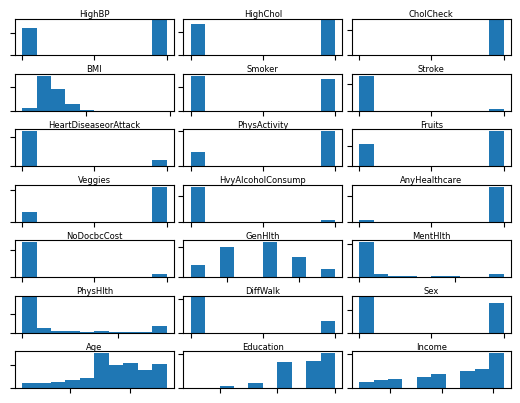

In [11]:
header = list(df.columns)

fig = plt.figure()
fig.subplots_adjust(hspace=0.5, wspace=0.06)

for i in range(21):
  plt.subplot(7, 3, i+1)
  plt.hist(df[header[i+1]])
  plt.title(header[i+1], fontsize=6, pad=1.1) 
  ax = plt.gca()
  ax.axes.xaxis.set_ticklabels([])
  ax.axes.yaxis.set_ticklabels([])

In [12]:
for i in range(21):
  X_Overfit[:, i] = X_Overfit[:, i] / X_Overfit[:, i].max()
  #print(X_Overfit[:, i])
  #print()

# **Initial Overfit Trial**

In [12]:
model = Sequential()
model.add(Dense(1, input_dim = len(X_Overfit[0, :]), activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
model.fit(x = X_Overfit, y = Y_Overfit, epochs=16, verbose = 1)
#batch_size= 129 

Epoch 1/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.5350 - accuracy: 0.7344
Epoch 2/16
2210/2210 [==============================] - 3s 1ms/step - loss: 0.5334 - accuracy: 0.7354
Epoch 3/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.5320 - accuracy: 0.7359
Epoch 4/16
2210/2210 [==============================] - 3s 1ms/step - loss: 0.5308 - accuracy: 0.7369
Epoch 5/16
2210/2210 [==============================] - 3s 1ms/step - loss: 0.5296 - accuracy: 0.7379
Epoch 6/16
2210/2210 [==============================] - 3s 1ms/step - loss: 0.5286 - accuracy: 0.7381
Epoch 7/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.5276 - accuracy: 0.7382
Epoch 8/16
2210/2210 [==============================] - 3s 1ms/step - loss: 0.5268 - accuracy: 0.7391
Epoch 9/16
2210/2210 [==============================] - 3s 1ms/step - loss: 0.5260 - accuracy: 0.7398
Epoch 10/16
2210/2210 [==============================] - 3s 2ms/step - loss: 0.525

In [21]:
overfit_predict = (model.predict(X_Overfit) > 0.5).astype(int)
overfit_predict
accuracy_score(Y_Overfit, overfit_predict)

print('Final accuracy was found to be: ', accuracy_score(Y_Overfit, overfit_predict))

2210/2210 [==============================] - 3s 1ms/step
Final accuracy was found to be:  0.49472358965653823


In [ ]:
# The function only works for models with more than one layer.
def test_model(neuron_arr, input_length, X, Y, num_epochs, num_batch, is_verbose):
  my_model = Sequential()
  my_model.add(Dense(neuron_arr[0], input_dim = input_length, activation='relu'))
  #
  for i in range(1, len(neuron_arr)):
    my_model.add(Dense(neuron_arr[i], activation='sigmoid'))
  #
  my_model.add(Dense(1, activation='sigmoid'))
  my_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
  my_model.fit(x=X, y=Y, epochs=num_epochs, batch_size=num_batch, verbose=is_verbose, shuffle=True)
  overfit_predict = (my_model.predict(X) > 0.5).astype(int)
  print('Final accuracy was found to be: ', accuracy_score(Y, overfit_predict))

In [ ]:
test_model([2, 1], len(X_Overfit[0, :]), X_Overfit, Y_Overfit, 16, 32, 1)

Epoch 1/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.6163 - accuracy: 0.6754
Epoch 2/16
2210/2210 [==============================] - 3s 2ms/step - loss: 0.5571 - accuracy: 0.7261
Epoch 3/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.5417 - accuracy: 0.7334
Epoch 4/16
2210/2210 [==============================] - 3s 2ms/step - loss: 0.5333 - accuracy: 0.7369
Epoch 5/16
2210/2210 [==============================] - 3s 2ms/step - loss: 0.5283 - accuracy: 0.7392
Epoch 6/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.5247 - accuracy: 0.7408
Epoch 7/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.5217 - accuracy: 0.7421
Epoch 8/16
2210/2210 [==============================] - 3s 2ms/step - loss: 0.5191 - accuracy: 0.7437
Epoch 9/16
2210/2210 [==============================] - 3s 2ms/step - loss: 0.5170 - accuracy: 0.7448
Epoch 10/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.515

In [ ]:
test_model([2, 1], len(X_Overfit[0, :]), X_Overfit, Y_Overfit, 512, 32, 0)

2210/2210 [==============================] - 3s 1ms/step
Final accuracy was found to be:  0.7510185028008827


In [ ]:
test_model([4, 2, 1], len(X_Overfit[0, :]), X_Overfit, Y_Overfit, 16, 32, 1)

Epoch 1/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.6507 - accuracy: 0.6577
Epoch 2/16
2210/2210 [==============================] - 5s 2ms/step - loss: 0.5730 - accuracy: 0.7243
Epoch 3/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.5482 - accuracy: 0.7315
Epoch 4/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.5368 - accuracy: 0.7370
Epoch 5/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.5303 - accuracy: 0.7384
Epoch 6/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.5254 - accuracy: 0.7406
Epoch 7/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.5218 - accuracy: 0.7434
Epoch 8/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.5185 - accuracy: 0.7455
Epoch 9/16
2210/2210 [==============================] - 5s 2ms/step - loss: 0.5161 - accuracy: 0.7460
Epoch 10/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.514

In [ ]:
test_model([4, 2, 1], len(X_Overfit[0, :]), X_Overfit, Y_Overfit, 512, 32, 0)

2210/2210 [==============================] - 3s 1ms/step
Final accuracy was found to be:  0.7525462570022068


In [ ]:
test_model([8, 4, 2, 1], len(X_Overfit[0, :]), X_Overfit, Y_Overfit, 16, 32, 1)

Epoch 1/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.6699 - accuracy: 0.6654
Epoch 2/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.5893 - accuracy: 0.7243
Epoch 3/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.5565 - accuracy: 0.7306
Epoch 4/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.5387 - accuracy: 0.7382
Epoch 5/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.5279 - accuracy: 0.7411
Epoch 6/16
2210/2210 [==============================] - 5s 2ms/step - loss: 0.5216 - accuracy: 0.7443
Epoch 7/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.5172 - accuracy: 0.7464
Epoch 8/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.5147 - accuracy: 0.7472
Epoch 9/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.5126 - accuracy: 0.7492
Epoch 10/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.511

In [ ]:
test_model([8, 4, 2, 1], len(X_Overfit[0, :]), X_Overfit, Y_Overfit, 512, 32, 0)

2210/2210 [==============================] - 3s 1ms/step
Final accuracy was found to be:  0.7538476772477791


In [ ]:
test_model([16, 8, 4, 2, 1], len(X_Overfit[0, :]), X_Overfit, Y_Overfit, 16, 32, 1)

Epoch 1/16
2210/2210 [==============================] - 5s 2ms/step - loss: 0.6838 - accuracy: 0.6015
Epoch 2/16
2210/2210 [==============================] - 5s 2ms/step - loss: 0.5993 - accuracy: 0.7258
Epoch 3/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.5649 - accuracy: 0.7336
Epoch 4/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.5468 - accuracy: 0.7389
Epoch 5/16
2210/2210 [==============================] - 5s 2ms/step - loss: 0.5351 - accuracy: 0.7431
Epoch 6/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.5268 - accuracy: 0.7461
Epoch 7/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.5218 - accuracy: 0.7471
Epoch 8/16
2210/2210 [==============================] - 5s 2ms/step - loss: 0.5187 - accuracy: 0.7482
Epoch 9/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.5164 - accuracy: 0.7498
Epoch 10/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.515

In [ ]:
test_model([128, 64, 32, 16, 8, 4, 2, 1], len(X_Overfit[0, :]), X_Overfit, Y_Overfit, 16, 32, 1)

Epoch 1/16
2210/2210 [==============================] - 6s 2ms/step - loss: 0.6935 - accuracy: 0.5006
Epoch 2/16
2210/2210 [==============================] - 6s 3ms/step - loss: 0.6932 - accuracy: 0.4975
Epoch 3/16
2210/2210 [==============================] - 5s 2ms/step - loss: 0.6932 - accuracy: 0.4958
Epoch 4/16
2210/2210 [==============================] - 6s 3ms/step - loss: 0.6932 - accuracy: 0.4965
Epoch 5/16
2210/2210 [==============================] - 5s 2ms/step - loss: 0.6932 - accuracy: 0.4980
Epoch 6/16
2210/2210 [==============================] - 5s 2ms/step - loss: 0.6932 - accuracy: 0.4989
Epoch 7/16
2210/2210 [==============================] - 6s 3ms/step - loss: 0.6932 - accuracy: 0.4988
Epoch 8/16
2210/2210 [==============================] - 5s 2ms/step - loss: 0.6932 - accuracy: 0.4993
Epoch 9/16
2210/2210 [==============================] - 6s 3ms/step - loss: 0.6932 - accuracy: 0.4997
Epoch 10/16
2210/2210 [==============================] - 5s 2ms/step - loss: 0.693

In [ ]:
test_model([4, 1], len(X_Overfit[0, :]), X_Overfit, Y_Overfit, 16, 32, 1)

Epoch 1/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.6270 - accuracy: 0.6721
Epoch 2/16
2210/2210 [==============================] - 5s 2ms/step - loss: 0.5637 - accuracy: 0.7258
Epoch 3/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.5498 - accuracy: 0.7320
Epoch 4/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.5412 - accuracy: 0.7354
Epoch 5/16
2210/2210 [==============================] - 5s 2ms/step - loss: 0.5353 - accuracy: 0.7380
Epoch 6/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.5310 - accuracy: 0.7394
Epoch 7/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.5274 - accuracy: 0.7412
Epoch 8/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.5243 - accuracy: 0.7429
Epoch 9/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.5215 - accuracy: 0.7435
Epoch 10/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.519

In [ ]:
test_model([4, 1], len(X_Overfit[0, :]), X_Overfit, Y_Overfit, 512, 32, 0)

2210/2210 [==============================] - 3s 1ms/step
Final accuracy was found to be:  0.7527867368301929


In [ ]:
test_model([8, 1], len(X_Overfit[0, :]), X_Overfit, Y_Overfit, 16, 32, 1)

Epoch 1/16
2210/2210 [==============================] - 5s 2ms/step - loss: 0.6116 - accuracy: 0.6978
Epoch 2/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.5612 - accuracy: 0.7320
Epoch 3/16
2210/2210 [==============================] - 3s 2ms/step - loss: 0.5454 - accuracy: 0.7362
Epoch 4/16
2210/2210 [==============================] - 3s 2ms/step - loss: 0.5361 - accuracy: 0.7401
Epoch 5/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.5298 - accuracy: 0.7410
Epoch 6/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.5248 - accuracy: 0.7438
Epoch 7/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.5210 - accuracy: 0.7456
Epoch 8/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.5179 - accuracy: 0.7462
Epoch 9/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.5157 - accuracy: 0.7484
Epoch 10/16
2210/2210 [==============================] - 3s 2ms/step - loss: 0.514

In [ ]:
test_model([8, 1], len(X_Overfit[0, :]), X_Overfit, Y_Overfit, 512, 32, 0)

2210/2210 [==============================] - 3s 1ms/step
Final accuracy was found to be:  0.7535930515475584


In [ ]:
test_model([1024, 1], len(X_Overfit[0, :]), X_Overfit, Y_Overfit, 16, 32, 1)

Epoch 1/16
2210/2210 [==============================] - 5s 2ms/step - loss: 0.5970 - accuracy: 0.7214
Epoch 2/16
2210/2210 [==============================] - 5s 2ms/step - loss: 0.5506 - accuracy: 0.7416
Epoch 3/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.5335 - accuracy: 0.7467
Epoch 4/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.5254 - accuracy: 0.7467
Epoch 5/16
2210/2210 [==============================] - 5s 2ms/step - loss: 0.5208 - accuracy: 0.7476
Epoch 6/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.5175 - accuracy: 0.7490
Epoch 7/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.5156 - accuracy: 0.7494
Epoch 8/16
2210/2210 [==============================] - 5s 2ms/step - loss: 0.5137 - accuracy: 0.7507
Epoch 9/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.5124 - accuracy: 0.7509
Epoch 10/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.511

In [ ]:
test_model([1024, 1], len(X_Overfit[0, :]), X_Overfit, Y_Overfit, 512, 32, 0)

2210/2210 [==============================] - 3s 1ms/step
Final accuracy was found to be:  0.7938380580546597


In [ ]:
test_model([2048, 1], len(X_Overfit[0, :]), X_Overfit, Y_Overfit, 512, 32, 0)

2210/2210 [==============================] - 4s 2ms/step
Final accuracy was found to be:  0.7635375997283993


In [ ]:
test_model([512, 256, 128, 64, 32, 16, 8, 4, 2, 1], len(X_Overfit[0, :]), X_Overfit, Y_Overfit, 16, 32, 1)

Epoch 1/16
2210/2210 [==============================] - 18s 7ms/step - loss: 0.6931 - accuracy: 0.5024
Epoch 2/16
2210/2210 [==============================] - 18s 8ms/step - loss: 0.6932 - accuracy: 0.4958
Epoch 3/16
2210/2210 [==============================] - 17s 8ms/step - loss: 0.6932 - accuracy: 0.4991
Epoch 4/16
2210/2210 [==============================] - 16s 7ms/step - loss: 0.6932 - accuracy: 0.5008
Epoch 5/16
2210/2210 [==============================] - 16s 7ms/step - loss: 0.6932 - accuracy: 0.4959
Epoch 6/16
2210/2210 [==============================] - 17s 8ms/step - loss: 0.6932 - accuracy: 0.5028
Epoch 7/16
2210/2210 [==============================] - 16s 7ms/step - loss: 0.6932 - accuracy: 0.4984
Epoch 8/16
2210/2210 [==============================] - 16s 7ms/step - loss: 0.6932 - accuracy: 0.5041
Epoch 9/16
2210/2210 [==============================] - 17s 8ms/step - loss: 0.6932 - accuracy: 0.5001
Epoch 10/16
2210/2210 [==============================] - 17s 8ms/step - l

In [ ]:
test_model([512, 256, 128, 64, 32, 16, 8, 4, 2, 1], len(X_Overfit[0, :]), X_Overfit, Y_Overfit, 512, 32, 0)

2210/2210 [==============================] - 6s 3ms/step
Final accuracy was found to be:  0.7972330673909354


In [15]:
def build_model(neuron_arr, XTRAIN, YTRAIN, XVALID, YVALID, num_epochs, num_batch, is_verbose):
  my_model = Sequential()
  my_model.add(Dense(neuron_arr[0], input_dim = len(XTRAIN[0, :]), activation='relu'))
  #
  for i in range(1, len(neuron_arr)):
    my_model.add(Dense(neuron_arr[i], activation='sigmoid'))
  #
  my_model.add(Dense(1, activation='sigmoid'))
  my_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
  callback_a = ModelCheckpoint(filepath = 'my_best', monitor='val_loss', save_best_only = True, save_weights_only = True, verbose = 0)
  callback_b = EarlyStopping(monitor='val_loss', mode='min', patience=20, verbose=1)
  history = my_model.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), epochs=num_epochs, batch_size=num_batch, verbose=is_verbose, callbacks = [callback_a, callback_b])
  print()
  print('TRAINING SET ACCURACY: ', accuracy_score(YTRAIN, (my_model.predict(XTRAIN) > 0.5).astype(int)))
  print()
  print('VALIDATION SET ACCURACY: ', accuracy_score(YVALID, (my_model.predict(XVALID) > 0.5).astype(int)))
  return history

def plot_history (history):
  plt.plot(history.history['accuracy']) # replace with accuracy/MAE
  plt.plot(history.history['val_accuracy']) # replace with val_accuracy, etc.
  plt.ylabel('Accuracy')
  plt.xlabel('epoch')
  plt.legend(['training data', 'validation data'], loc='lower right')
  plt.show()

In [14]:
twenty_percent = int(len(dataset[:, 0]) * 0.2)
XTRAIN = dataset[:twenty_percent, 1:]
YTRAIN = dataset[:twenty_percent, 0]
XVALID = dataset[twenty_percent:, 1:]
YVALID = dataset[twenty_percent:, 0]

print(np.shape(XTRAIN))
print(np.shape(YTRAIN))
print(np.shape(XVALID))
print(np.shape(YVALID))

(14138, 21)
(14138,)
(56554, 21)
(56554,)


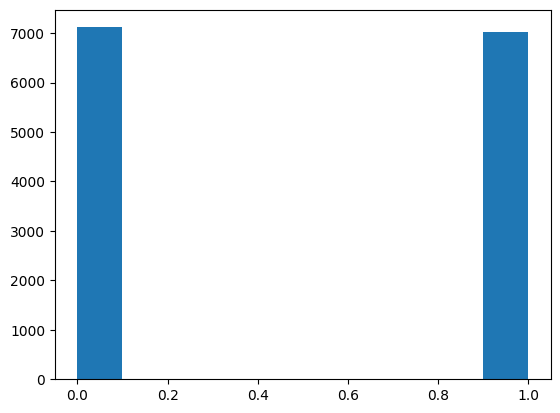

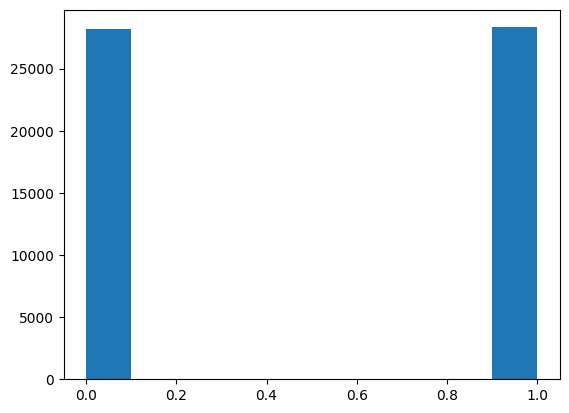

In [39]:
plt.hist(YTRAIN)
plt.show()

plt.hist(YVALID)
plt.show()

Epoch 229: early stopping

442/442 [==============================] - 1s 1ms/step
TRAINING SET ACCURACY:  0.7460744093931249

1768/1768 [==============================] - 3s 2ms/step
VALIDATION SET ACCURACY:  0.7480814796477703



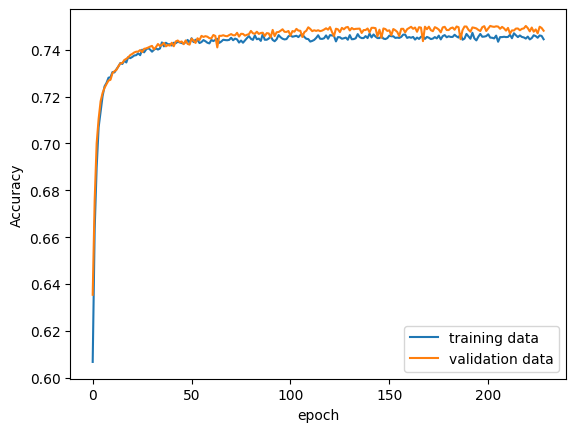

In [20]:
history = build_model([1], XTRAIN, YTRAIN, XVALID, YVALID, 512, 32, 0)
print()
plot_history(history)

Epoch 187: early stopping

442/442 [==============================] - 1s 2ms/step
TRAINING SET ACCURACY:  0.7467109916536993

1768/1768 [==============================] - 3s 2ms/step
VALIDATION SET ACCURACY:  0.7483113484457333



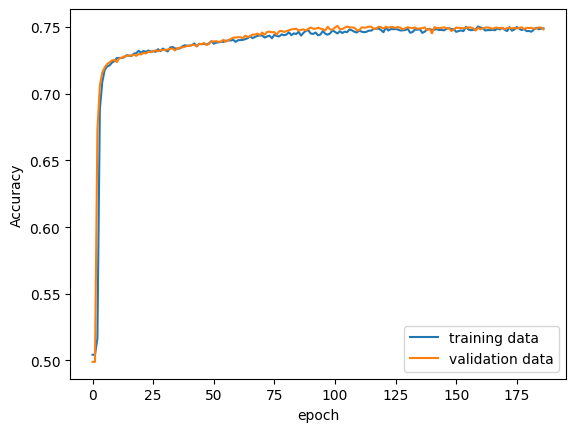

In [27]:
history = build_model([2, 1], XTRAIN, YTRAIN, XVALID, YVALID, 512, 32, 0)
print()
plot_history(history)

Epoch 285: early stopping

442/442 [==============================] - 1s 1ms/step
TRAINING SET ACCURACY:  0.755693874664026

1768/1768 [==============================] - 2s 1ms/step
VALIDATION SET ACCURACY:  0.7518477914913181



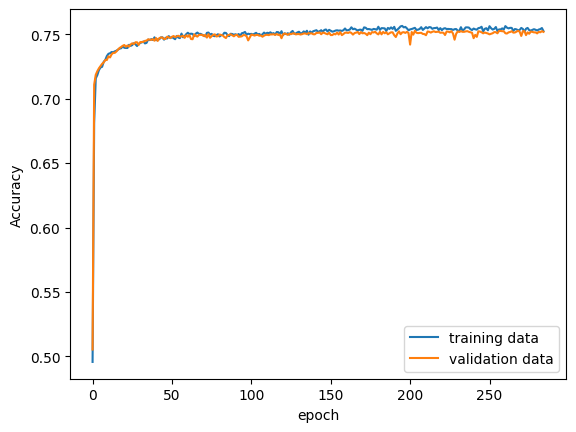

In [25]:
history = build_model([4, 2, 1], XTRAIN, YTRAIN, XVALID, YVALID, 512, 32, 0)
print()
plot_history(history)

Epoch 55: early stopping

442/442 [==============================] - 1s 1ms/step
TRAINING SET ACCURACY:  0.7835620314047248

1768/1768 [==============================] - 2s 1ms/step
VALIDATION SET ACCURACY:  0.7425469462814301



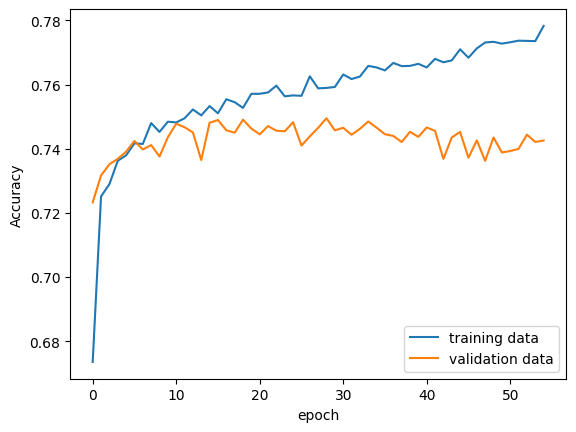

In [28]:
history = build_model([512, 1], XTRAIN, YTRAIN, XVALID, YVALID, 512, 32, 0)
print()
plot_history(history)

Epoch 1/10
429/442 [============================>.] - ETA: 0s - loss: 0.6593 - accuracy: 0.6181
Epoch 1: val_loss improved from inf to 0.60167, saving model to my_best
442/442 [==============================] - 13s 26ms/step - loss: 0.6580 - accuracy: 0.6200 - val_loss: 0.6017 - val_accuracy: 0.7190
Epoch 2/10
437/442 [============================>.] - ETA: 0s - loss: 0.5441 - accuracy: 0.7745
Epoch 2: val_loss improved from 0.60167 to 0.47985, saving model to my_best
442/442 [==============================] - 3s 7ms/step - loss: 0.5434 - accuracy: 0.7751 - val_loss: 0.4798 - val_accuracy: 0.8313
Epoch 3/10
437/442 [============================>.] - ETA: 0s - loss: 0.4128 - accuracy: 0.8995
Epoch 3: val_loss improved from 0.47985 to 0.33974, saving model to my_best
442/442 [==============================] - 4s 8ms/step - loss: 0.4118 - accuracy: 0.8999 - val_loss: 0.3397 - val_accuracy: 0.9448
Epoch 4/10
423/442 [===========================>..] - ETA: 0s - loss: 0.2740 - accuracy: 0.97

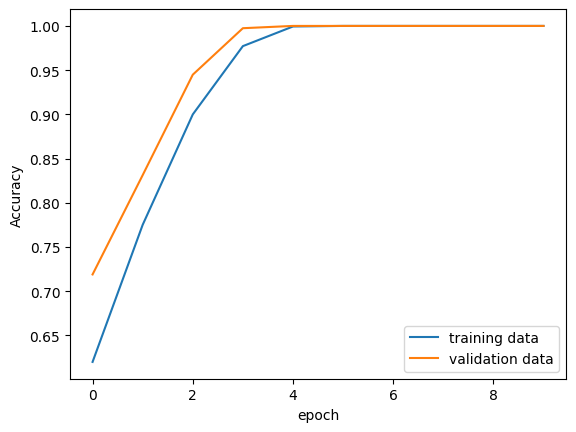

In [54]:
XTRAIN_with_output = dataset[:twenty_percent, :]
XVALID_with_output = dataset[twenty_percent:, :]

history = build_model([1], XTRAIN_with_output, YTRAIN, XVALID_with_output, YVALID, 10, 32, 1)
print()
plot_history(history)

## Phase 3 (Part 2): Buliding a Custom Prediction Model



In [106]:
#import plotly.express as px
#px.scatter_3d(df, x = 'BMI', y= 'AnyHealthcare', z = 'Diabetes_binary', opacity = 0.5)

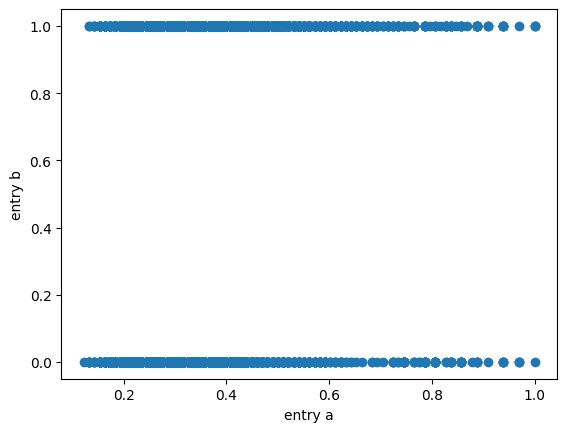

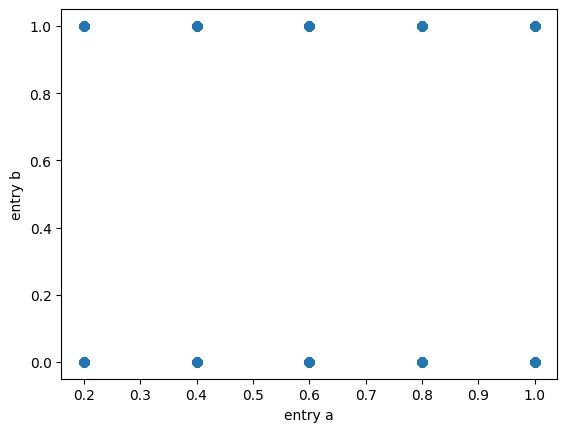

In [75]:
plt.scatter(dataset[:, 4],dataset[:, 0])
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

plt.scatter(dataset[:, 14],dataset[:, 0])
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

In [4]:
def my_prediction_function(model, features):
  numOfFeatures = features.shape[1]
  weight = model.layers[-1].get_weights()[0]
  bias = model.layers[-1].get_weights()[1]   
  z = 0
  for i in range(numOfFeatures):
    z = z + features[:,i]*weight
  z = z + bias
  result = 1/(1+np.exp(-z))
  return result.reshape(-1) 

In [105]:
function_history = build_model([1], XTRAIN, YTRAIN, XVALID, YVALID, 512, 32, 0)

Epoch 176: early stopping

442/442 [==============================] - 1s 1ms/step
TRAINING SET ACCURACY:  0.7440231998868299

1768/1768 [==============================] - 3s 2ms/step
VALIDATION SET ACCURACY:  0.7496198323725997


In [121]:
#Defining input_features to only include 'BMI' and 'AnyHealthcare' features.
input_features = XVALID[:, [4, 14]]

p = my_prediction_function(function_history.model, XVALID)

print(p)
accuracy_score(YVALID, (p > 0.5).astype(int))

[1.         1.         1.         ... 0.99999992 1.         0.99999999]


0.5008841107613962

1768/1768 [==============================] - 3s 2ms/step


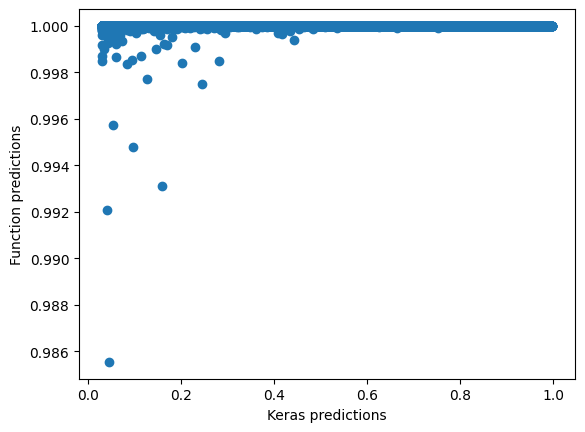

In [110]:
function_history.model.predict(XVALID)

plt.scatter(function_history.model.predict(XVALID), my_prediction_function(function_history.model, XVALID))
plt.xlabel('Keras predictions')
plt.ylabel('Function predictions')
plt.show()

1768/1768 [==============================] - 3s 1ms/step


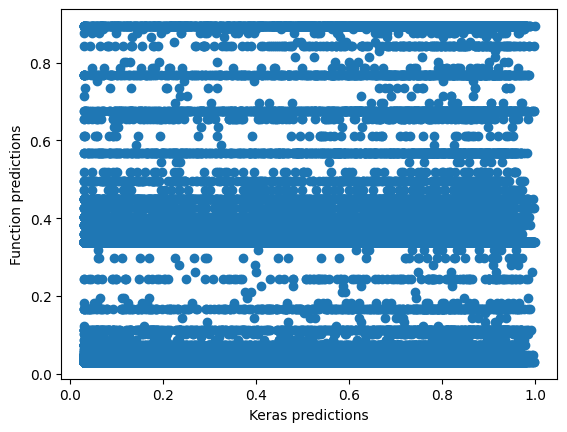

In [111]:
function_history.model.predict(XVALID)

plt.scatter(function_history.model.predict(XVALID), my_prediction_function(function_history.model, input_features))
plt.xlabel('Keras predictions')
plt.ylabel('Function predictions')
plt.show()

In [174]:
accuracy_score(YTRAIN, (function_predictions > 0.5).astype(int))

0.4956853869005517

In [64]:
hArr = [None]*21

for i in range(21):
  hArr[i] = build_model([1], XTRAIN[:, i].reshape((len(XTRAIN_single), 1)), YTRAIN, XVALID[:, i].reshape((len(XVALID_single), 1)), YVALID, 512, 32, 0)
  print

Epoch 32: early stopping

442/442 [==============================] - 1s 1ms/step
TRAINING SET ACCURACY:  0.5005658508982883

1768/1768 [==============================] - 3s 1ms/step
VALIDATION SET ACCURACY:  0.4998585422781766
Epoch 34: early stopping

442/442 [==============================] - 1s 1ms/step
TRAINING SET ACCURACY:  0.5005658508982883

1768/1768 [==============================] - 2s 1ms/step
VALIDATION SET ACCURACY:  0.4998585422781766
Epoch 24: early stopping

442/442 [==============================] - 1s 1ms/step
TRAINING SET ACCURACY:  0.4994341491017117

1768/1768 [==============================] - 3s 1ms/step
VALIDATION SET ACCURACY:  0.5001414577218234
Epoch 88: early stopping

442/442 [==============================] - 1s 1ms/step
TRAINING SET ACCURACY:  0.6342481256188994

1768/1768 [==============================] - 3s 2ms/step
VALIDATION SET ACCURACY:  0.6374261767514234
Epoch 50: early stopping

442/442 [==============================] - 1s 1ms/step
TRAINING SE

In [56]:
singleArr = [None]*21

for i in range(21):
  singleArr[i] = build_model([1], XTRAIN[:, i].reshape((len(XTRAIN[:, i]), 1)), YTRAIN, XVALID[:, i].reshape((len(XVALID[:, i]), 1)), YVALID, 512, 822, 0)
  print()

Epoch 106: early stopping

442/442 [==============================] - 1s 1ms/step
TRAINING SET ACCURACY:  0.6829113028716933

1768/1768 [==============================] - 3s 1ms/step
VALIDATION SET ACCURACY:  0.6907911023092973

Epoch 113: early stopping

442/442 [==============================] - 16s 2ms/step
TRAINING SET ACCURACY:  0.6437261281652285

1768/1768 [==============================] - 3s 2ms/step
VALIDATION SET ACCURACY:  0.6445874739187325

Epoch 21: early stopping

442/442 [==============================] - 1s 2ms/step
TRAINING SET ACCURACY:  0.5035365681143019

1768/1768 [==============================] - 3s 2ms/step
VALIDATION SET ACCURACY:  0.49911588923860384

Epoch 21: early stopping

442/442 [==============================] - 1s 1ms/step
TRAINING SET ACCURACY:  0.5035365681143019

1768/1768 [==============================] - 3s 2ms/step
VALIDATION SET ACCURACY:  0.49911588923860384

Epoch 63: early stopping

442/442 [==============================] - 1s 1ms/step
TR

In [59]:
TrainAcc = [None] * 21
ValidAcc = [None] * 21

for i in range(21):
  XMOD = singleArr[i].model.predict(XTRAIN[:, i].reshape((len(XTRAIN[:, 0]), 1)))
  TrainAcc[i] =  accuracy_score(YTRAIN, (XMOD > 0.5).astype(int))
  XMOD = singleArr[i].model.predict(XVALID[:, i].reshape((len(XVALID[:, 0]), 1)))
  ValidAcc[i] =  accuracy_score(YVALID, (XMOD > 0.5).astype(int))

1768/1768 [==============================] - 4s 2ms/step


In [122]:
for i in range(21):
  print("i =", i)
  print(TrainAcc[i])
  print(ValidAcc[i])
  print()

i = 0
0.6829113028716933
0.6907911023092973

i = 1
0.6437261281652285
0.6445874739187325

i = 2
0.5035365681143019
0.49911588923860384

i = 3
0.5035365681143019
0.49911588923860384

i = 4
0.5466826991087849
0.5420129433815468

i = 5
0.5368510397510255
0.5286451886692365

i = 6
0.5035365681143019
0.49911588923860384

i = 7
0.575258169472344
0.5718074760405983

i = 8
0.5035365681143019
0.49911588923860384

i = 9
0.5035365681143019
0.49911588923860384

i = 10
0.5035365681143019
0.49911588923860384

i = 11
0.5035365681143019
0.49911588923860384

i = 12
0.5035365681143019
0.49911588923860384

i = 13
0.5035365681143019
0.49911588923860384

i = 14
0.533951053897298
0.5283799554408176

i = 15
0.5035365681143019
0.49911588923860384

i = 16
0.5035365681143019
0.49911588923860384

i = 17
0.5035365681143019
0.49911588923860384

i = 18
0.5035365681143019
0.49911588923860384

i = 19
0.5035365681143019
0.49911588923860384

i = 20
0.5035365681143019
0.49911588923860384



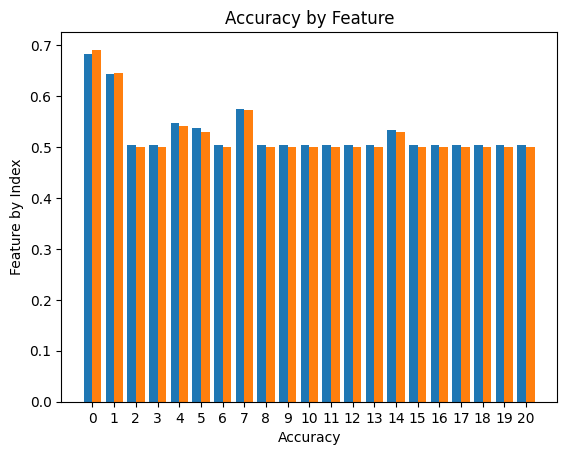

In [64]:
x = np.arange(21)

plt.bar(x-0.2, TrainAcc, 0.4)
plt.bar(x+0.2, ValidAcc, 0.4)
plt.title('Accuracy by Feature')
plt.xlabel('Accuracy')
plt.ylabel('Feature by Index')
#plt.grid(color='grey', linestyle='--')
plt.xticks(np.arange(0, 21, 1))
plt.savefig('AccuracyByFeature.png')
plt.show()

In [79]:
header = list(df.columns.values)

get_features = [0, 1, 4, 5, 7, 14]
for i in get_features:
  print(header[i+1])

HighBP
HighChol
Smoker
Stroke
PhysActivity
MentHlth


Epoch 260: early stopping

442/442 [==============================] - 1s 1ms/step
TRAINING SET ACCURACY:  0.6921063799688782

1768/1768 [==============================] - 4s 2ms/step
VALIDATION SET ACCURACY:  0.6921172684513915


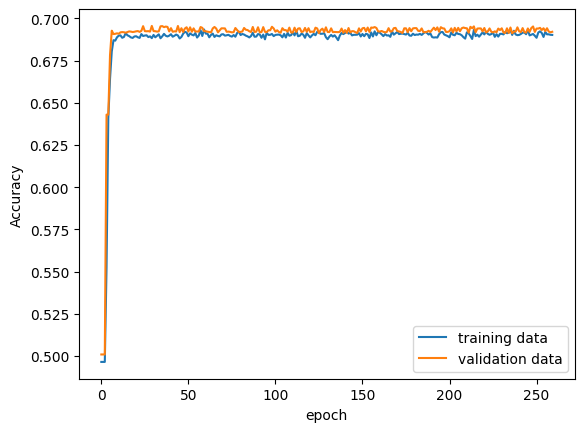

In [90]:
A_features = [0, 1, 4, 5, 7, 14]
ATRAIN = XTRAIN[:, A_features]
AVALID = XVALID[:, A_features]

modelA = build_model([512, 1], ATRAIN, YTRAIN, AVALID, YVALID, 512, 822, 0)
plot_history (modelA)

Epoch 321: early stopping

442/442 [==============================] - 1s 1ms/step
TRAINING SET ACCURACY:  0.6900551704625831

1768/1768 [==============================] - 3s 1ms/step
VALIDATION SET ACCURACY:  0.690879513385437


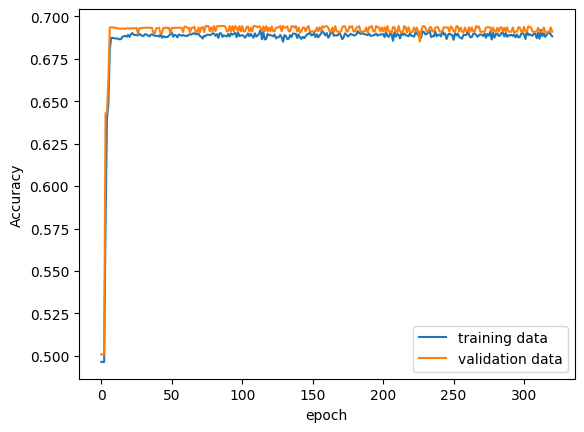

In [92]:
B_features = [0, 1, 4, 5, 7]
BTRAIN = XTRAIN[:, B_features]
BVALID = XVALID[:, B_features]

modelB = build_model([512, 1], BTRAIN, YTRAIN, BVALID, YVALID, 512, 822, 0)
plot_history (modelB)

Epoch 352: early stopping

442/442 [==============================] - 1s 1ms/step
TRAINING SET ACCURACY:  0.680506436553968

1768/1768 [==============================] - 4s 2ms/step
VALIDATION SET ACCURACY:  0.6843901403967889


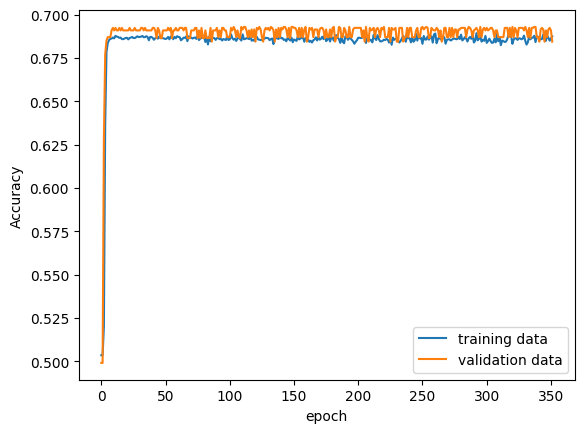

In [95]:
C_features = [0, 1, 4, 7]
CTRAIN = XTRAIN[:, C_features]
CVALID = XVALID[:, C_features]

modelC = build_model([512, 1], CTRAIN, YTRAIN, CVALID, YVALID, 512, 822, 0)
plot_history (modelC)

Epoch 254: early stopping

442/442 [==============================] - 1s 1ms/step
TRAINING SET ACCURACY:  0.6852454378271325

1768/1768 [==============================] - 3s 1ms/step
VALIDATION SET ACCURACY:  0.686441277363228


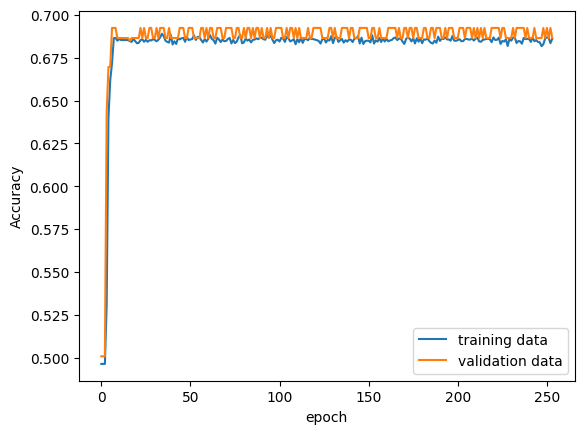

In [96]:
D_features = [0, 1, 7]
DTRAIN = XTRAIN[:, D_features]
DVALID = XVALID[:, D_features]

modelD = build_model([512, 1], DTRAIN, YTRAIN, DVALID, YVALID, 512, 822, 0)
plot_history (modelD)

Epoch 168: early stopping

442/442 [==============================] - 1s 2ms/step
TRAINING SET ACCURACY:  0.6829113028716933

1768/1768 [==============================] - 3s 2ms/step
VALIDATION SET ACCURACY:  0.6907911023092973


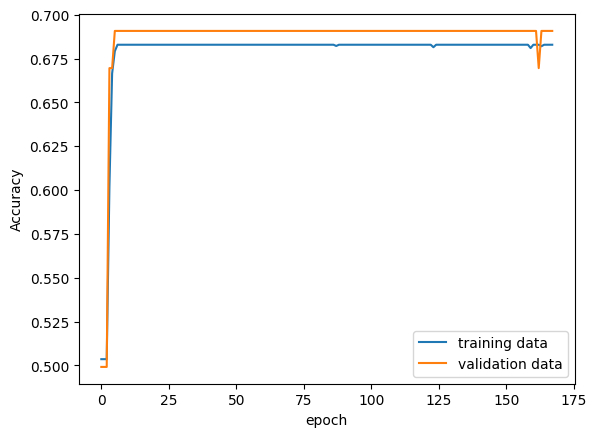

In [99]:
E_features = [0, 1]
ETRAIN = XTRAIN[:, E_features]
EVALID = XVALID[:, E_features]

modelE = build_model([512, 1], ETRAIN, YTRAIN, EVALID, YVALID, 512, 822, 0)
plot_history (modelE)

Epoch 168: early stopping

442/442 [==============================] - 1s 2ms/step
TRAINING SET ACCURACY:  0.6829113028716933

1768/1768 [==============================] - 3s 2ms/step
VALIDATION SET ACCURACY:  0.6907911023092973


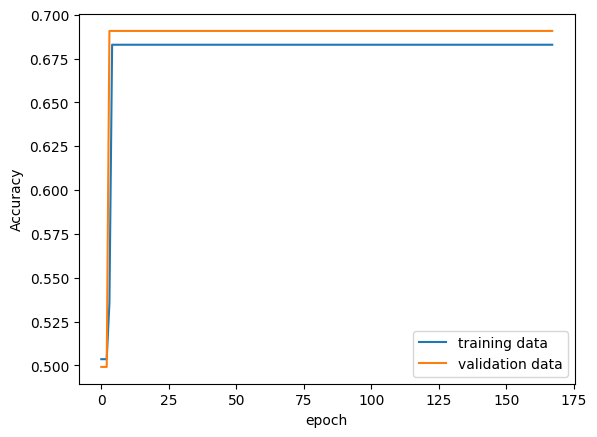

In [102]:
F_features = [0]
FTRAIN = XTRAIN[:, F_features]
FVALID = XVALID[:, F_features]

modelF = build_model([512, 1], FTRAIN, YTRAIN, FVALID, YVALID, 512, 822, 0)
plot_history (modelF)

Epoch 234: early stopping

442/442 [==============================] - 1s 2ms/step
TRAINING SET ACCURACY:  0.7666572358183619

1768/1768 [==============================] - 3s 1ms/step
VALIDATION SET ACCURACY:  0.7425292640662022


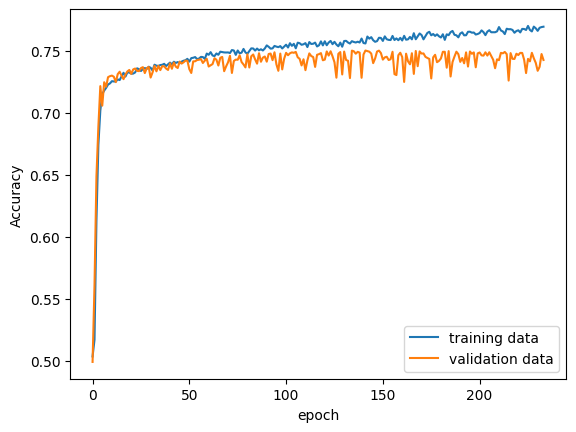

In [103]:
modelALL = build_model([512, 1], XTRAIN, YTRAIN, XVALID, YVALID, 512, 822, 0)
plot_history (modelALL)

In [131]:

tally = 0
for i in range(len(dataset[:, 8])):
  if (dataset[i, 0] == 1 and dataset[i, 8]):
    tally += 1
print(tally/len(dataset[:,8]))


0.31526905448989984
